In [68]:
import numpy as np
from numpy import math 
from math import exp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
from sklearn.datasets import load_boston 

In [69]:
boston = load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=['TARGET'] )
data=pd.concat([features, target], axis=1)

In [70]:
sep = 0.8*len(data)
sep = int(sep)

x_train = np.array(data['RM'] [:sep])
y_train = np.array(data['LSTAT'] [:sep])
z_train = np.array(data['TARGET'] [:sep])

x_test=np.array(data['RM'][sep:])
y_test=np.array(data['LSTAT'][sep:])
z_test=np.array(data['TARGET'][sep:])

x_train=x_train/x_train.mean()
y_train=y_train/y_train.mean()
z_train=z_train/z_train.mean()                     

x_test=x_test/x_test.mean()
y_test=y_test/y_test.mean()
z_test=z_test/z_test.mean()
                     

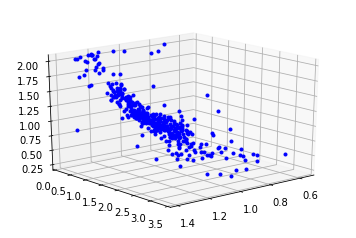

In [101]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.view_init(20,50)
ax.plot3D(x_train,y_train,z_train,'b.')

In [72]:
def hypothesis(a,b,c,d,x,y):
    return a * x + b*np.exp(-c*y) + d
    

In [73]:
def error(a,b,c,d,x,y,z):
    e=0
    m=len(z)
    for i in range(m):
        e +=np.power((hypothesis(a,b,c,d,x[i],y[i])-z[i]),2)
    return (1/(2*m)*e)

In [74]:
def step_gradient(a,b,c,d,x,y,z,learning_rate):
    grad_a=0
    grad_b=0
    grad_c=0
    grad_d=0
    m=len(z)
    
    for i in range(m):
        grad_a += 2/m * (hypothesis(a,b,c,d,x[i],y[i]) -z[i])* x[i]
        grad_b += 2/m * (hypothesis(a,b,c,d,x[i],y[i]) -z[i])* np.exp(-c*y[i])
        grad_c += 2/m * (hypothesis(a,b,c,d,x[i],y[i]) -z[i])* (-b*y[i]*np.exp(-c*y[i]))
        grad_d += 2/m * (hypothesis(a,b,c,d,x[i],y[i]) -z[i])
        
    a=a-(grad_a*learning_rate)
    b=b-(grad_b*learning_rate)
    c=c-(grad_c*learning_rate)
    d=d-(grad_d*learning_rate)
    
    return a,b,c,d
    

In [75]:
def descend(initial_a,initial_b,initial_c,initial_d,x,y,z,learning_rate,iterations):
    a=initial_a
    b=initial_b
    c=initial_c
    d=initial_d
    
    for i in range(iterations):
        e=error(a,b,c,d,x,y,z)
        a,b,c,d=step_gradient(a,b,c,d,x,y,z,learning_rate)
        if i % 500 == 0:
            print(f"Error:{e}, a:{a}, b:{b}, c:{c}, d{d}")
            
    return a,b,c,d

In [76]:
init_a=1
init_b=1
init_c=1
init_d=1


iters=10000
learning_rate=0.01

In [77]:
final_a,final_b,final_c,final_d=descend(init_a,init_b,init_c,init_d,x_train,y_train,z_train,learning_rate,iters)

Error:1.0373612051579928, a:0.9715962181227735, b:0.9880172109437829, c:1.0090441771434255, d0.9715098311633039
Error:0.02871409890080853, a:0.4079905071793018, b:0.9161883294960866, c:1.1921079161901544, d0.2630352033982155
Error:0.026230153789681132, a:0.44838422163826, b:1.0412508441320538, c:1.219179128794449, d0.18168304256779882
Error:0.024839808792286273, a:0.48554516068449377, b:1.1293327683993064, c:1.2443140897085185, d0.1182889911644757
Error:0.02403013571946086, a:0.5198775120192257, b:1.1907363499760484, c:1.267809694420565, d0.06792886463461373
Error:0.02353104862641822, a:0.5517578610234943, b:1.232969745482434, c:1.289976452486634, d0.02708303562969785
Error:0.023200648066721712, a:0.58150769447952, b:1.2614785890908962, c:1.3110386985245441, d-0.006773285937770665
Error:0.022964317830608944, a:0.6093918369077995, b:1.2801984553573968, c:1.3311388206685566, d-0.03545585125012044
Error:0.022782640318106263, a:0.6356261249741083, b:1.2919655429799664, c:1.350362833354752,

In [78]:
final_a,final_b,final_c,final_d

(0.864614345238606,
 1.2779310680949654,
 1.5254876624364975,
 -0.23878218345565888)

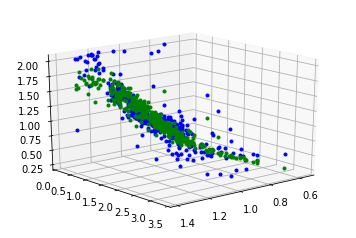

In [97]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.view_init(20,50)
ax.plot3D(x_train,y_train,z_train,'b.')
ax.plot3D(x_train,y_train,hypothesis(final_a,final_b,final_c,final_d,x_train,y_train),'g.')

In [98]:
a=0.864614345238606
b= 1.2779310680949654
c= 1.5254876624364975
d=-0.23878218345565888

error(a,b,c,d,x_train,y_train,z_train)

0.02177827872385336

In [99]:
error(a,b,c,d,x_test,y_test,z_test)

0.03389106410261791

In [100]:
data.corr('pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
